In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_SBUX = pd.read_csv('dataset_clean\\clean_stock_SBUX_ytd', sep=';')
df_SBUX.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420


In [4]:
df_MCD = pd.read_csv('dataset_clean\\clean_stock_MCD_ytd', sep=';')
df_MCD.head()

,Date,Open,High,Low,Close,Volume,diff
0,2023-01-03,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


In [5]:
SBUX_MCD = df_SBUX.merge(df_MCD, on='Date', suffixes=('_SBUX', '_MCD'))
SBUX_MCD

,Date,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2023-11-13,103.919998,104.230003,102.959999,103.510002,7120800,-0.409996,267.399994,269.720001,267.260010,269.200012,2591900,1.800018
218,2023-11-14,104.480003,105.820000,104.239998,105.599998,8323000,1.119995,270.000000,271.660004,269.350006,271.489990,2647800,1.489990
219,2023-11-15,105.660004,106.540001,105.660004,106.029999,7980200,0.369995,272.429993,273.100006,269.019989,270.390015,2575900,-2.039978
220,2023-11-16,106.279999,107.660004,106.199997,107.209999,8036300,0.930000,271.070007,276.160004,271.029999,276.119995,3593700,5.049988


### Line plot MCD vs SBUX

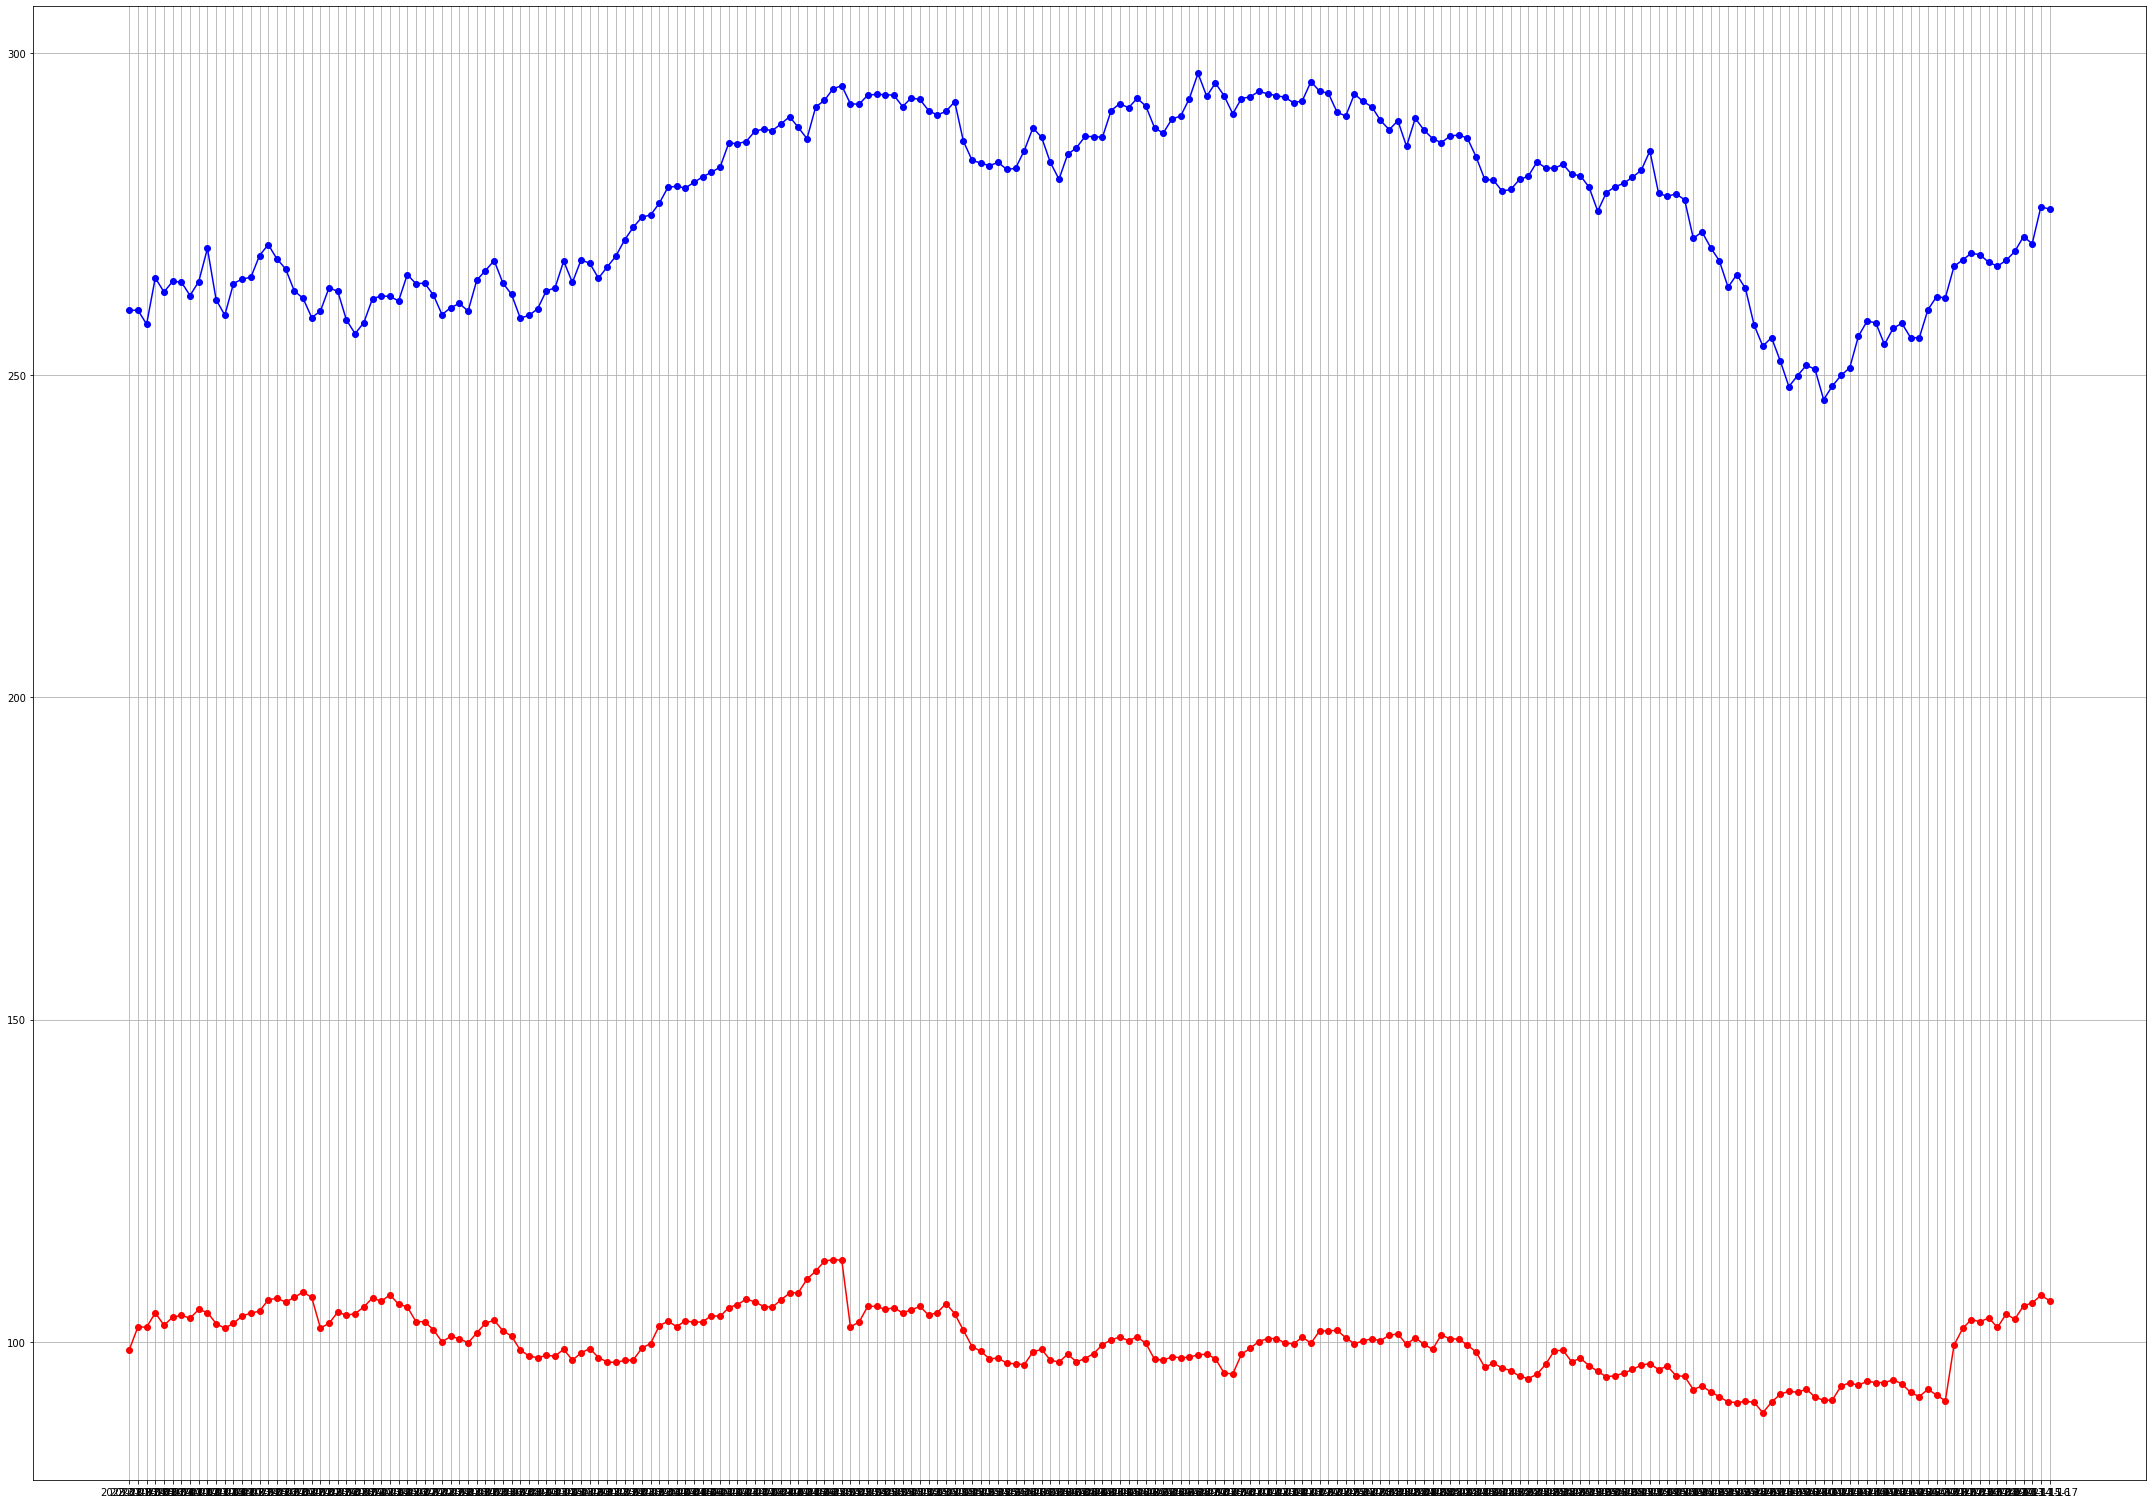

In [17]:
plt.figure(figsize=(30,21))

plt.plot(SBUX_MCD['Date'], SBUX_MCD['Open_MCD'], label='Data1', marker='o', linestyle='-', color='blue')
plt.plot(SBUX_MCD['Date'], SBUX_MCD['Close_SBUX'], label='Data1', marker='o', linestyle='-', color='red')

plt.tight_layout()
plt.grid()
plt.show()


<Axes: >

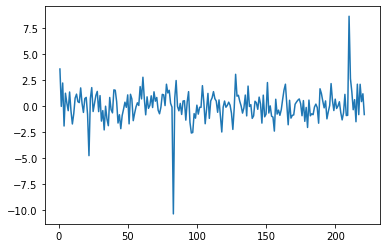

In [21]:
SBUX_MCD['Close_SBUX'].diff().plot()

<Axes: >

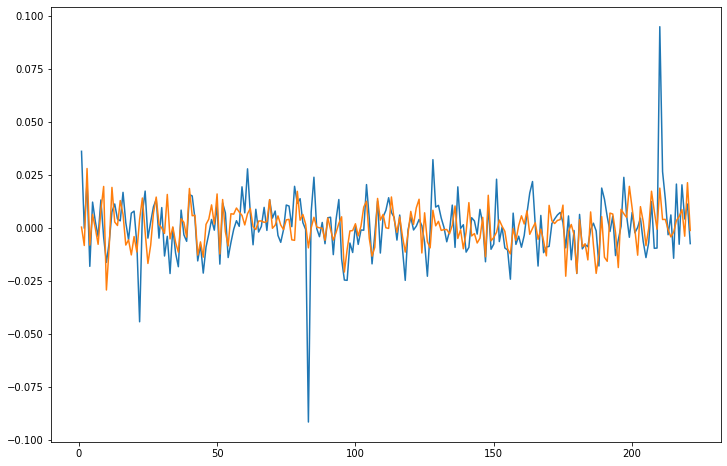

In [28]:
SBUX_MCD['Close_SBUX'].pct_change().plot(x=SBUX_MCD['Date'],figsize=(12,8))
SBUX_MCD['Close_MCD'].pct_change().plot(x= SBUX_MCD['Date'],figsize=(12,8))

### Percentage change visualization


<Axes: xlabel='Close_MCD', ylabel='Close_SBUX'>

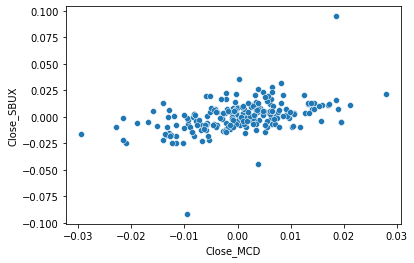

In [29]:
import seaborn as sns

sns.scatterplot(x=SBUX_MCD['Close_MCD'].pct_change(), y=SBUX_MCD['Close_SBUX'].pct_change())

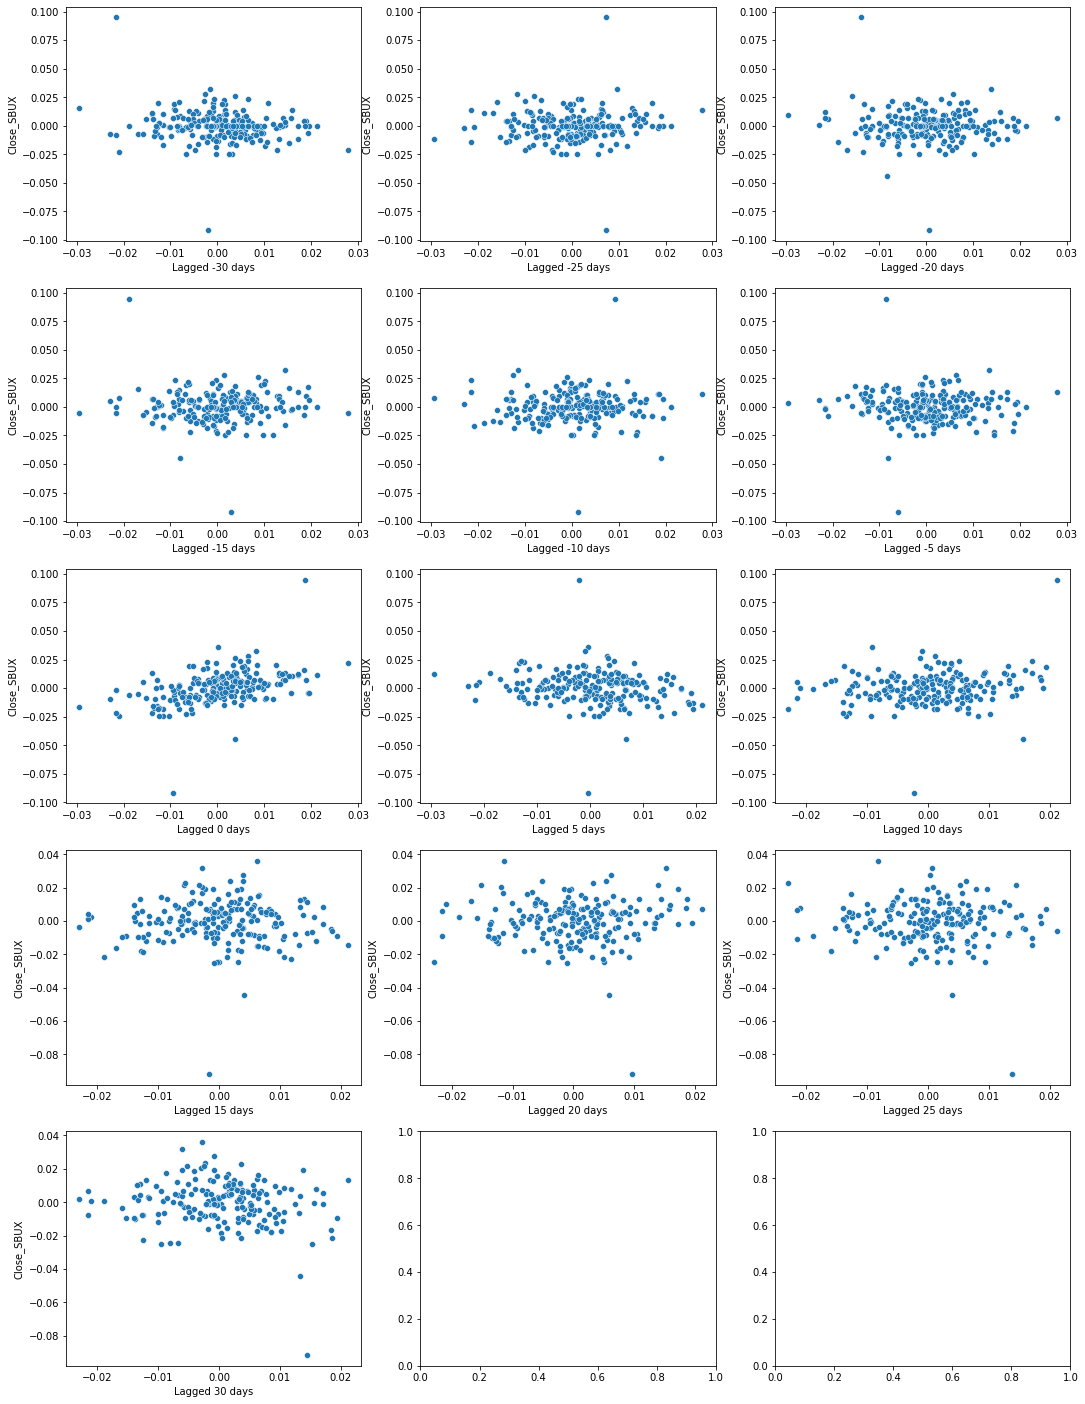

In [55]:
#Membuat scatter plot Lagged Correlation

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-30,31,5):
    plt.subplot(5,3,i)
    sns.scatterplot(x=SBUX_MCD['Close_MCD'].pct_change(), y=SBUX_MCD['Close_SBUX'].shift(lagged).pct_change())
    plt.xlabel(f'Lagged {lagged} days')
    i += 1

plt.show()

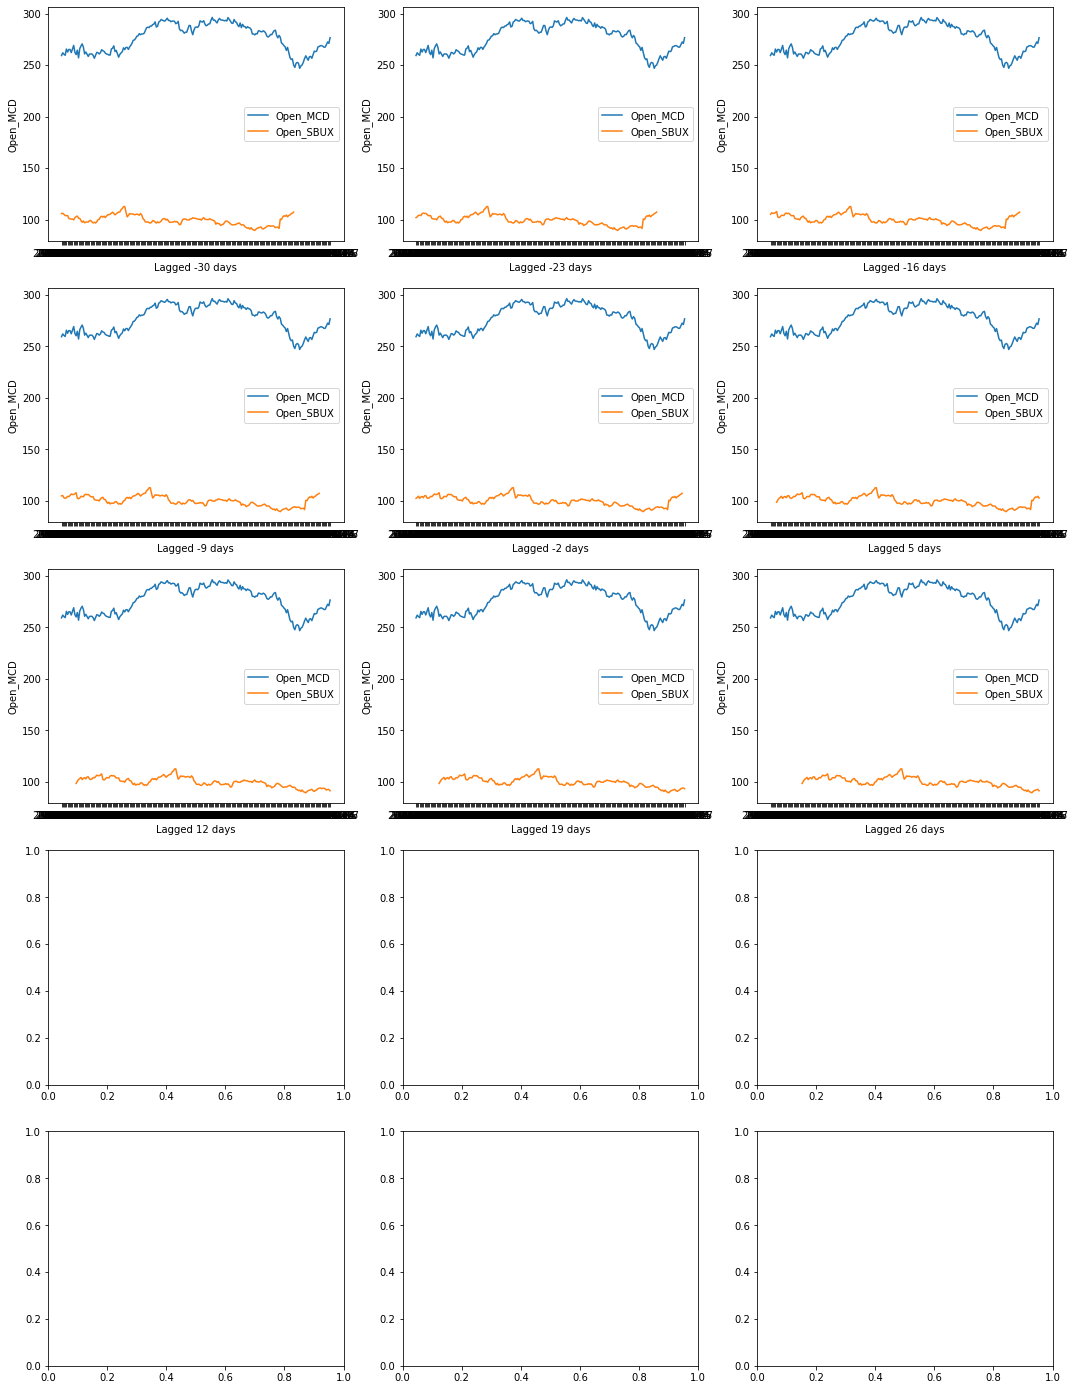

In [61]:
#Membuat scatter plot Lagged Correlation

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-30,31,7):
    plt.subplot(5,3,i)
    sns.lineplot(x= SBUX_MCD['Date'], y=SBUX_MCD['Open_MCD'], label='Open_MCD', markers='o')
    sns.lineplot(x=SBUX_MCD['Date'], y=SBUX_MCD['Open_SBUX'].shift(lagged), label='Open_SBUX', markers='x')
    plt.xlabel(f'Lagged {lagged} days')
    i += 1


plt.show()

In [59]:
SBUX_MCD.head()

,Date,Open_SBUX,High_SBUX,Low_SBUX,Close_SBUX,Volume_SBUX,diff_SBUX,Open_MCD,High_MCD,Low_MCD,Close_MCD,Volume_MCD,diff_MCD
0,2023-01-03,98.493532,99.090998,97.425935,98.757988,6607700,0.264456,259.239921,260.046580,255.285375,260.026886,2743800,0.786965
1,2023-01-04,100.579769,102.577848,100.442646,102.313393,8166600,1.733624,261.915613,262.210717,258.610326,260.085907,2584100,-1.829706
2,2023-01-05,102.342761,102.940226,101.363311,102.283997,5575100,-0.058765,260.449892,260.449892,257.124911,257.892212,1945600,-2.557680
3,2023-01-06,103.214489,104.801201,102.852097,104.497574,9644100,1.283085,259.466185,265.496397,259.102213,265.083221,2855400,5.617037
4,2023-01-09,104.331052,104.487767,102.284004,102.587631,10124800,-1.743420,265.535717,265.555411,262.427156,262.899353,2654600,-2.636364


### Normalized Value Analysis

In [100]:
#SBUX_MCD.set_index('Date', inplace=True)

September_Oktober = SBUX_MCD.loc['2023-09-01':'2023-10-30']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
September_Oktober_Scaled = pd.DataFrame(scaler.fit_transform(September_Oktober[['Close_MCD', 'Close_SBUX']]), columns=['Close_MCD', 'Close_SBUX'])

September_Oktober_Scaled.head(50)



,Close_MCD,Close_SBUX
0,0.900959,1.000000
1,0.854809,0.863849
2,0.758361,0.759390
3,0.833290,0.659625
4,0.856365,0.680751
5,0.870366,0.726525
6,0.894996,0.793427
7,0.922478,0.874414
8,1.000000,0.901409
9,0.830697,0.792254


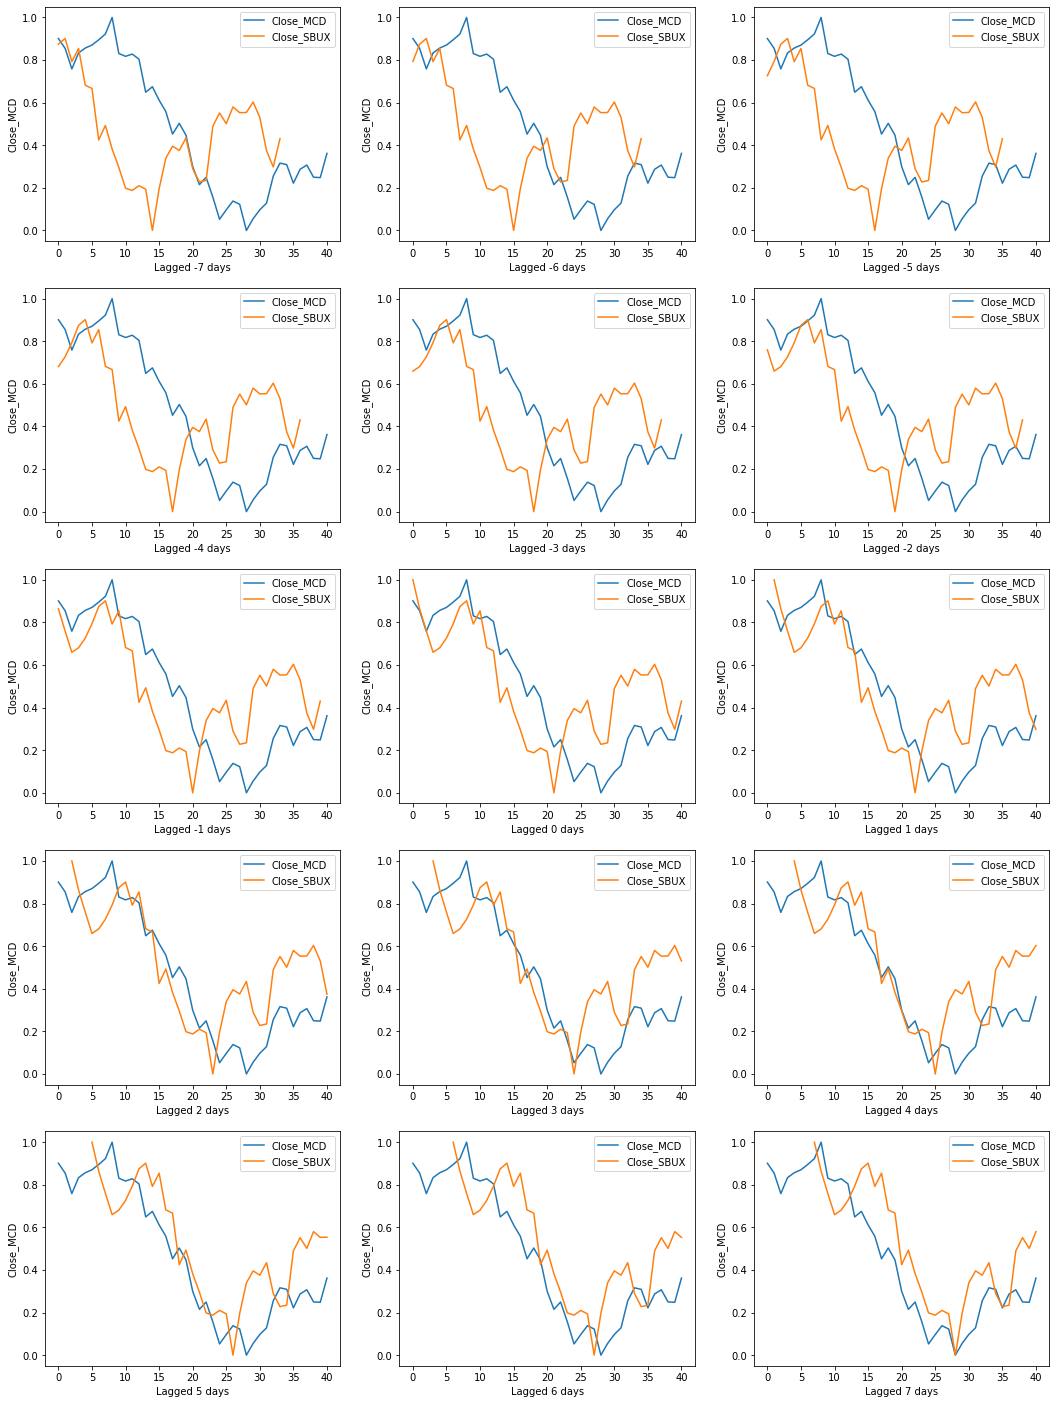

In [101]:
#Membuat line plot Lagged 

fig, axes = plt.subplots(5,3, figsize=(18,25))

i = 1
for lagged in range(-7,8):
    plt.subplot(5,3,i)
    sns.lineplot(x=September_Oktober_Scaled.index, y=September_Oktober_Scaled['Close_MCD'], label='Close_MCD', markers='o')
    sns.lineplot(x=September_Oktober_Scaled.index, y=September_Oktober_Scaled['Close_SBUX'].shift(lagged), label='Close_SBUX', markers='o')
    plt.xlabel(f'Lagged {lagged} days')
    i += 1


plt.show()

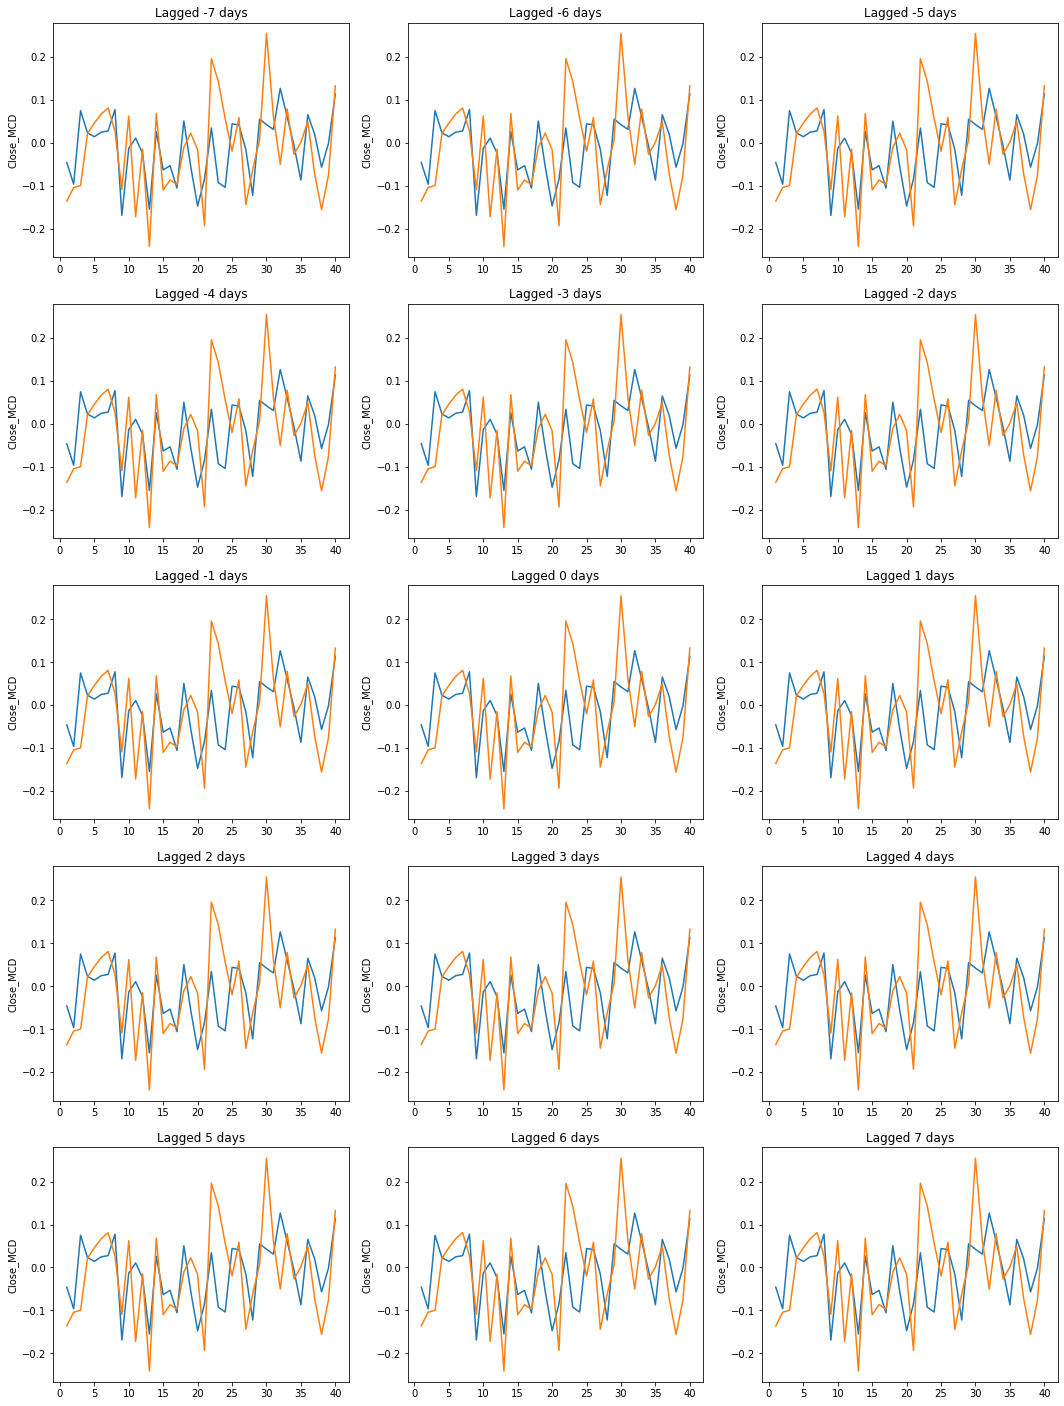

In [103]:
fig, axes = plt.subplots(5,3,figsize=(18,25))

i = 1
for lagged in range (-7,8):
    plt.subplot(5,3,i)
    #sns.scatterplot(x=September_Oktober_Scaled['Close_MCD'].diff(), y=September_Oktober_Scaled['Close_SBUX'].diff(lagged).pct_change())
    sns.lineplot(x=September_Oktober_Scaled.index, y= September_Oktober_Scaled['Close_MCD'].diff())
    sns.lineplot(x=September_Oktober_Scaled.index, y= September_Oktober_Scaled['Close_SBUX'].diff())
    plt.title(f'Lagged {lagged} days')
    i += 1

plt.show()